In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [26]:
dataset = pd.read_csv("/kaggle/input/e-commerce/e-commerce.csv",encoding='windows-1252')
dataset.shape

(3312, 19)

In [27]:
dataset.head()
dataset.info()
dataset.describe()
dataset.isnull().sum()
dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [28]:

data = dataset.loc[:, ['Order Date', 'Ship Mode','Segment', 'Region','Category', 'Sales','Quantity', 'Discount', 'Profit']]
data["Order Date"] = pd.to_datetime(data["Order Date"], format='%d-%m-%Y')

print(data["Order Date"].head())
data["Month of Order"] = data["Order Date"].dt.month
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
data["Month of Order"] = data["Month of Order"].map(month_names)


0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: Order Date, dtype: datetime64[ns]


Ship Mode  contains  4 unique values
Segment  contains  3 unique values
Region  contains  4 unique values
Category  contains  3 unique values
Month of Order  contains  12 unique values


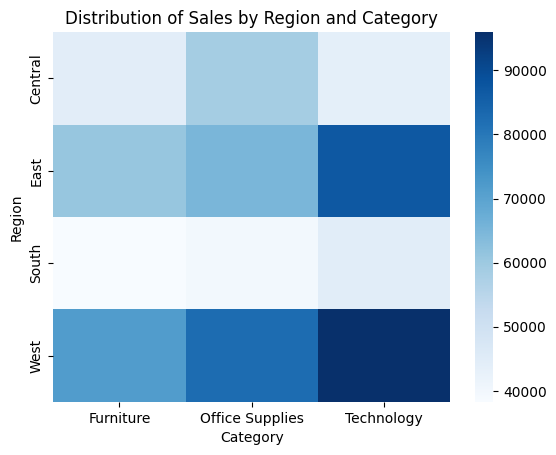

In [29]:
categorical = [var for var in data.columns if data[var].dtype=='O']
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), 'unique values')
pivot = pd.pivot_table(data, values="Sales", index="Region", columns="Category", aggfunc="sum")
sns.heatmap(pivot, cmap="Blues")
plt.xlabel("Category")
plt.ylabel("Region")
plt.title("Distribution of Sales by Region and Category")
plt.show()

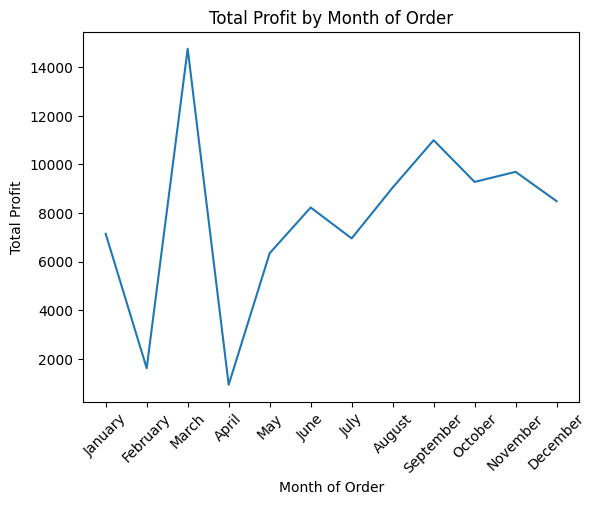

In [30]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Month of Order"] = data["Order Date"].dt.month

profit_by_month = data.pivot_table(index="Month of Order", values="Profit", aggfunc="sum").reset_index()
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
profit_by_month["Month of Order"] = pd.Categorical(profit_by_month["Month of Order"], categories=range(1, 13), ordered=True)
profit_by_month = profit_by_month.sort_values("Month of Order")

plt.plot(profit_by_month["Month of Order"], profit_by_month["Profit"])
plt.xlabel("Month of Order")
plt.ylabel("Total Profit")
plt.title("Total Profit by Month of Order")
plt.xticks(range(1, 13), month_names, rotation=45)
plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(data[['Ship Mode', 'Region', 'Category', 'Sales', 'Quantity', 'Discount']], data['Profit'], test_size=0.2, random_state=42)
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['Ship Mode', 'Region', 'Category']])
X_test_encoded = encoder.transform(X_test[['Ship Mode', 'Region', 'Category']])
X_train_combined = pd.concat([pd.DataFrame(X_train_encoded.toarray()), X_train[['Sales', 'Quantity', 'Discount']].reset_index(drop=True)], axis=1)
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined = pd.concat([pd.DataFrame(X_test_encoded.toarray()), X_test[['Sales', 'Quantity', 'Discount']].reset_index(drop=True)], axis=1)
y_train_binary = [1 if profit > 0 else 0 for profit in y_train]
y_test_binary = [1 if profit > 0 else 0 for profit in y_test]
clf = GaussianNB()
clf.fit(X_train_combined, y_train_binary)
y_pred = clf.predict(X_train_combined)
accuracy = accuracy_score(y_train_binary, y_pred)
print("Accuracy:", accuracy)
X_train, X_test, y_train, y_test = train_test_split(data[[ 'Region' ,'Ship Mode',  'Sales', 'Discount']], data['Profit'], test_size=0.2, random_state=42)
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[[  'Region' ]])
X_test_encoded = encoder.transform(X_test[[  'Region']])
X_train_combined = pd.concat([pd.DataFrame(X_train_encoded.toarray()), X_train[[ 'Sales',  'Discount']].reset_index(drop=True)], axis=1)
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined = pd.concat([pd.DataFrame(X_test_encoded.toarray()), X_test[[ 'Sales', 'Discount']].reset_index(drop=True)], axis=1)
y_train_binary = [1 if profit > 0 else 0 for profit in y_train]
y_test_binary = [1 if profit > 0 else 0 for profit in y_test]
clf = GaussianNB()
clf.fit(X_train_combined, y_train_binary)
y_pred = clf.predict(X_train_combined)
accuracy = accuracy_score(y_train_binary, y_pred)
print("Accuracy:", accuracy)
predict = {"0" : [1],"1" : [0],"2" : [0], "3" : [0], "Sales" : 1,"Discount" : 0}
p = pd.DataFrame(data=predict)
p.columns = p.columns.astype(str)

y_pred1 = clf.predict(p)
print(y_pred1)

Accuracy: 0.9192147980369951
Accuracy: 0.9346923367308418
[1]


Confusion matrix

 [[ 355  164]
 [   9 2121]]

True Positives(TP) =  355

True Negatives(TN) =  2121

False Positives(FP) =  164

False Negatives(FN) =  9


<AxesSubplot: >

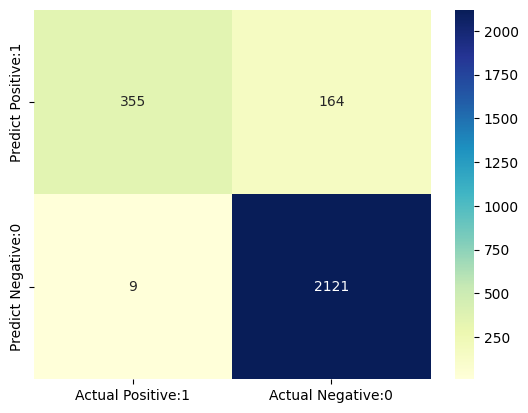

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_binary, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_train_binary, y_pred))
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       519
           1       0.93      1.00      0.96      2130

    accuracy                           0.93      2649
   macro avg       0.95      0.84      0.88      2649
weighted avg       0.94      0.93      0.93      2649

Classification accuracy : 0.9347
